<a href="https://colab.research.google.com/github/Anny-Verly/Projeto-Python-MASL/blob/main/Caderno_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <center>  </center>

# <center> Caderno 2
# <center> Representações Matemáticas de Sistemas de Controle </center>


##2.1 Sistemas Lineares e Invariantes no Tempo

<p align="justify"> A classe particular de sistemas que possuem características de linearidade e invariância temporal podem ser representadas por modelos Lineares e Invariantes no Tempo (L.I.T) (7). Dessa forma, podem-se destacar as três principais formas de representação de modelos contínuos L.I.T (2):

* Equações Diferenciais Ordinárias (E.D.Os).

* Função de Transferência.

* Modelo em Espaço de Estados.


<p align="justify"> A Figura 2.1 apresenta as relações de transformações de modelos no domínio do
tempo para o domínio da frequência. Pode-se notar que quando $x(t)$ é um impulso, $y(t)$ é a resposta ao impulso do sistema, logo $H(s)$, que descreve a F.T, é a resposta ao impulso do sistema. As próximas seções são dedicadas a realizar essas representações de forma computacional, utilizando o Colab.


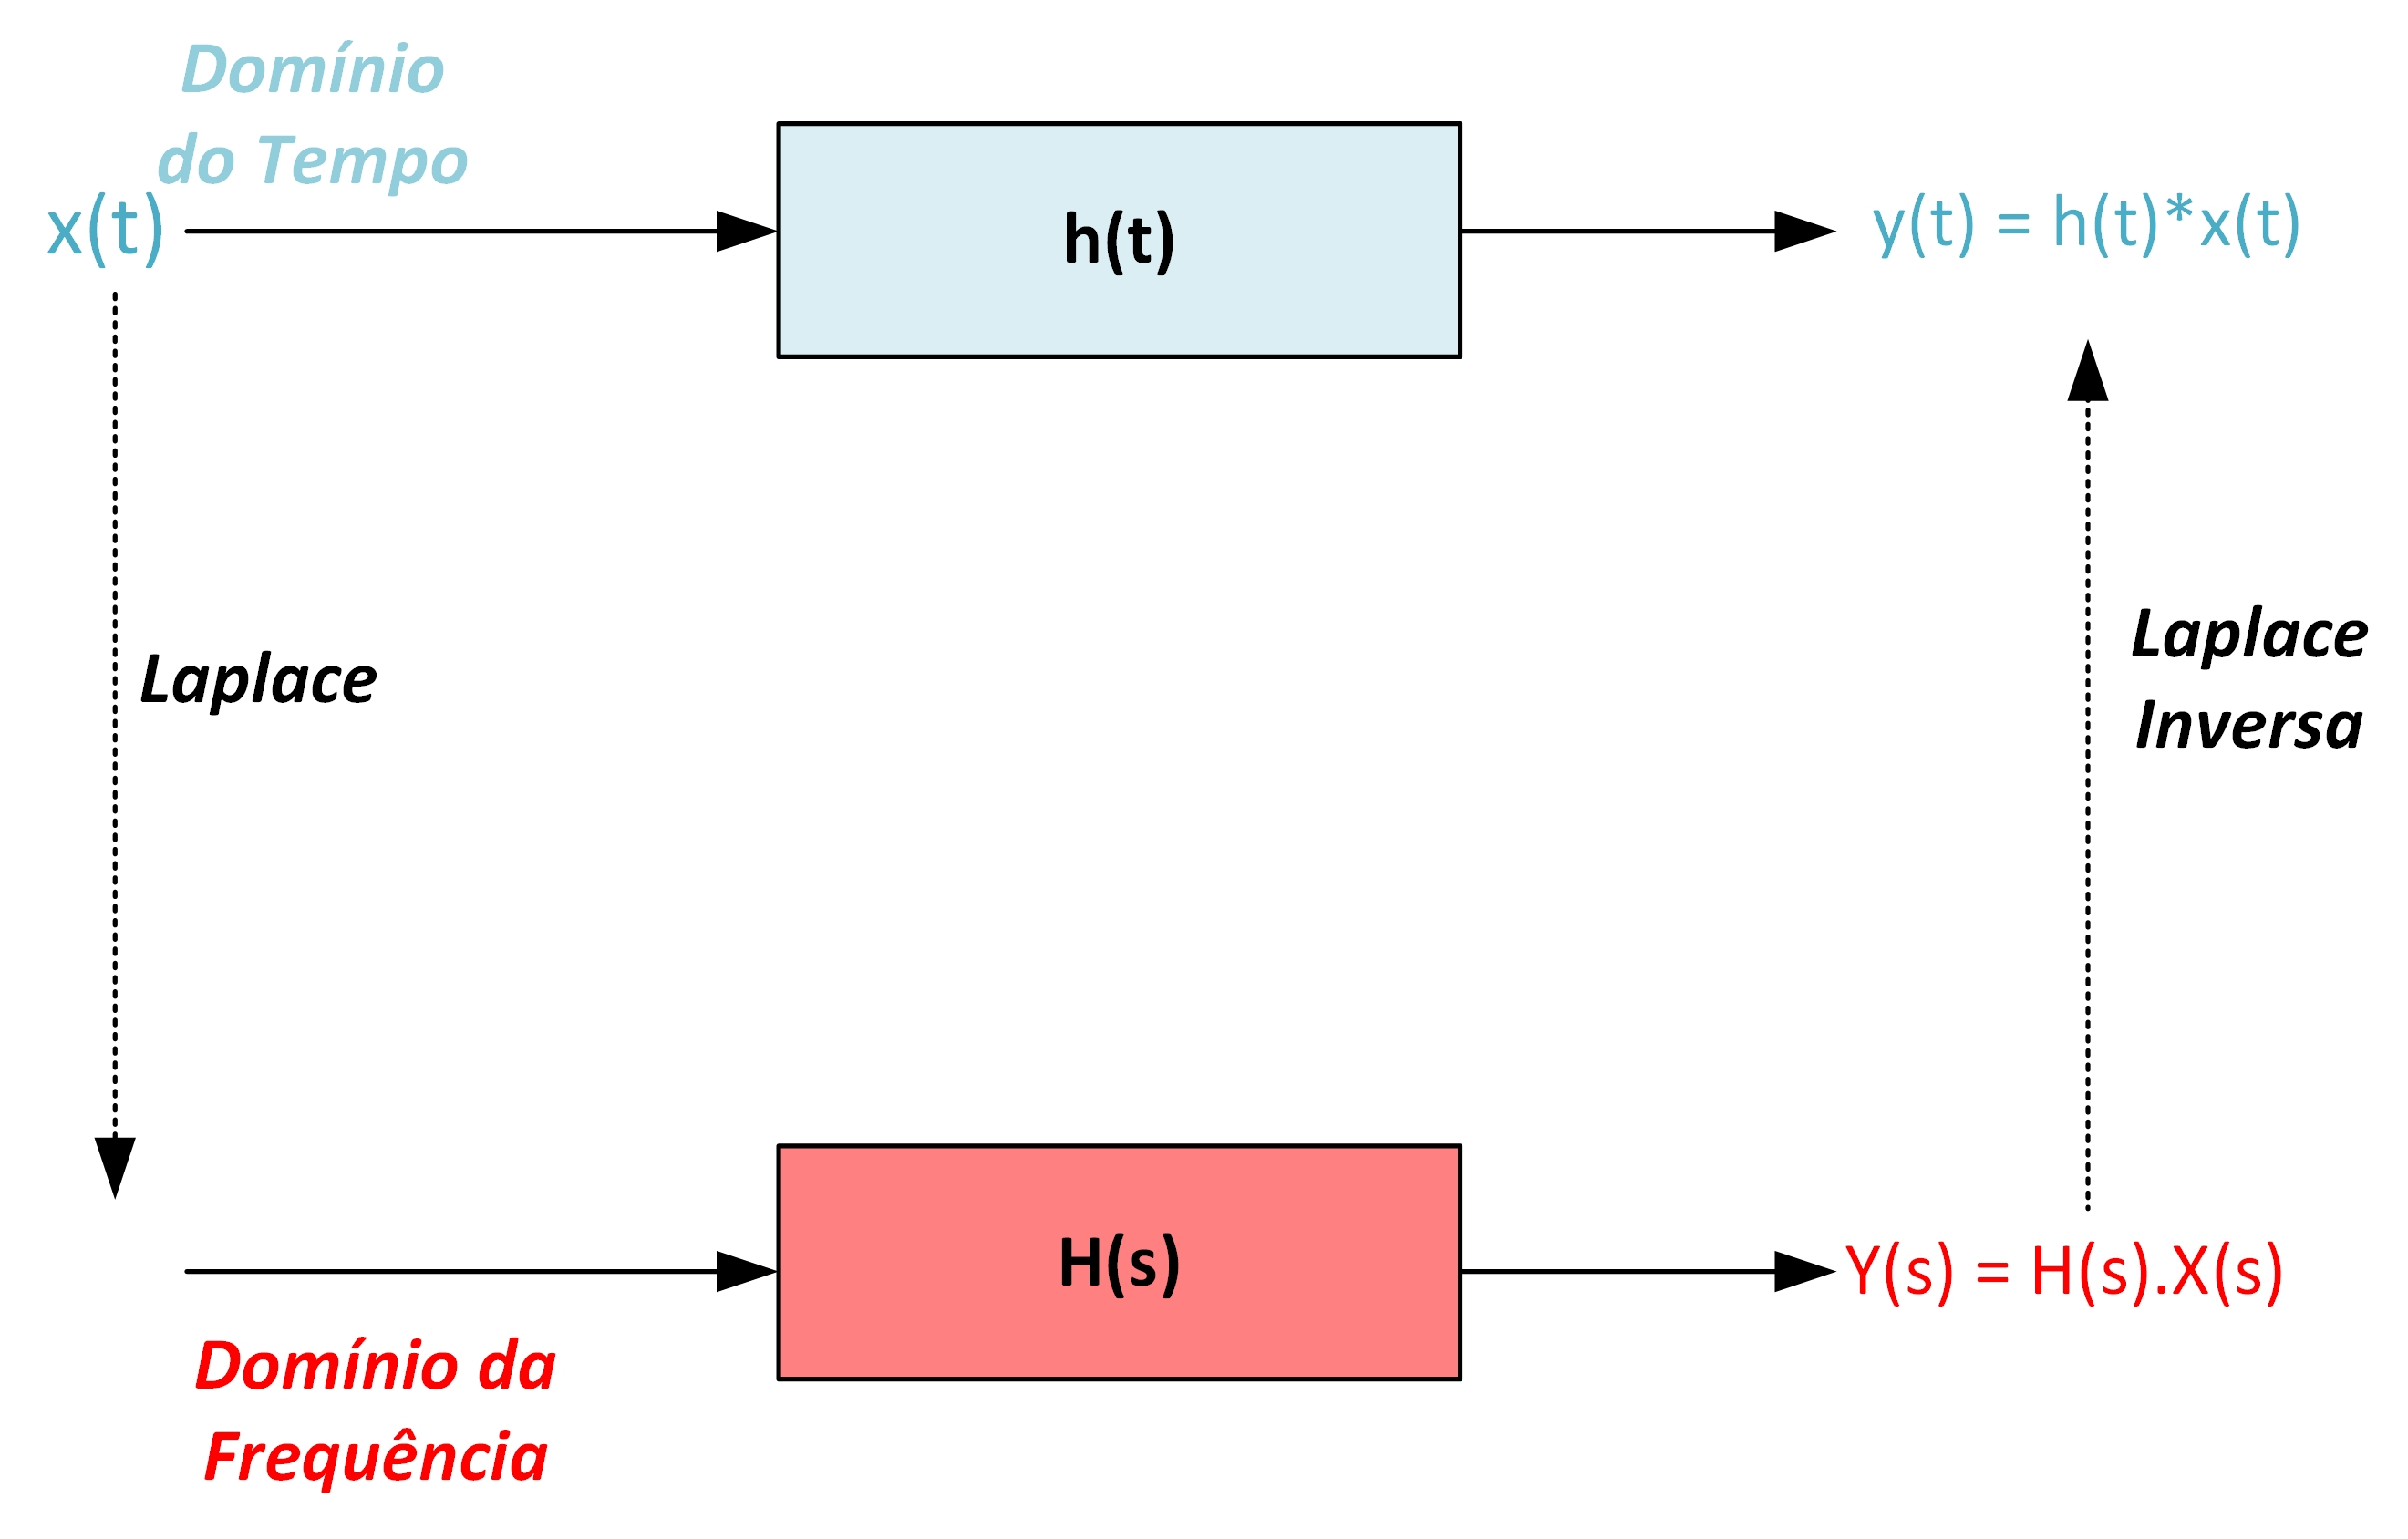

## <center> 2.2 Representação em Função de Transferência <center>

Em um sistema LIT, a Função de Transferência (FT) é a relação matemática entre a entrada e a saída no domínio da frequência com as condições iniciais iguais a zero (1).

# **<center> Colocar função em python aqui <center>**

**Exemplo 2.1:**

Neste exemplo deseja-se realizar a modelagem de um circuito RLC (filtro passa
baixa passivo), mostrado na Figura 6, de modo a obter a EDO e a FT que o representam.

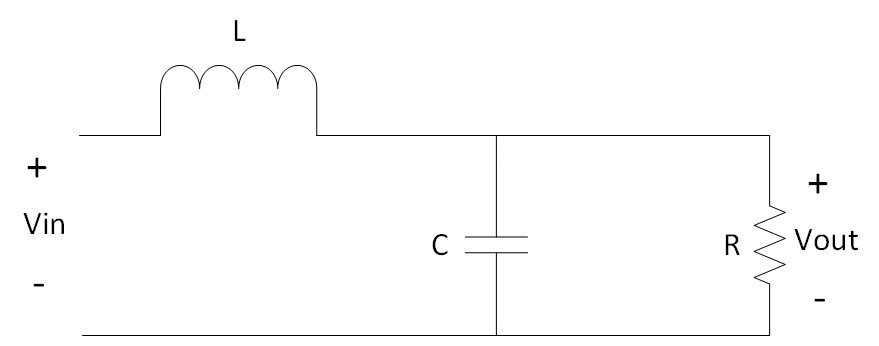

Dados:

* $ V_{in}(t) = A.sen(2.\pi.f.t); $
* $ A = 1.0 [V]; f = 10^4 Hz; R = 10Ω; L = 10^{−3}H; C = 10^{−6}F $

A relação entre a entrada e a saída deste sistema é apresentado na Equação 2.1

$$ \frac{d^2Vout(t)}{dt^2} = \frac{V_{in}(t) - V_{out}(t) - \frac{L}{R} \frac{dVout(t)}{dt} }{LC} $$

Ao isolar a tensão de entrada, obtém-se a Equação 2.2

$$ V_{in}(t) = V_{out}(t) + \frac{dVout(t)}{dt} + LC \frac{d^2Vout(t)}{dt^2}$$

A FT é obtida aplicando a Transformada de Laplace de ambos os lados da equação
anterior e isolando os termos conforme mostrado na Equação 2.3

$$ \frac{V_{out}(s)}{V_{in}(s) = \frac{1}{1 + \frac{L}{R} + LCs^2 }} $$

O algoritmo implementado em Python para declarar a FT é mostrado abaixo.

In [ ]:
# Definindo a variável s como simbólica
s = ctl.tf('s')
# Dados do problema:
A = 1.0;
f = 1e+4;
R = 10;   # Resistor [Ohm]
L = 1e-3; # Indutor [H]
C = 1e-6; # Capacitor [F]
num = 1   # Numerador da FT
den = 1 + (L/R)*s + L*C*s**2 # Denominador da FT
FT = num / den
print(FT)

###2.2.1 Função de Transferência de Sistemas em Cascata

Sistemas mais complexos são compostos por diversos subsistemas. Quando estes
subsistemas estão conectados em série o denominamos de sistemas em cascata (1). A Figura 7 mostra esse tipo de operação.

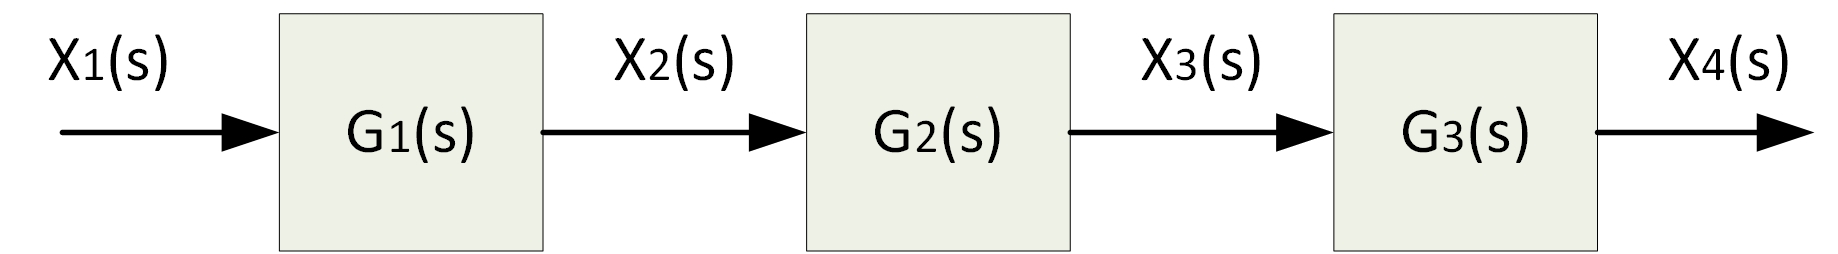

Sabe-se que as FT’s individuais são dadas por:

$$ G_1(s) = \frac{X_2(s)}{X_1(s)} ; G_2(s) = \frac{X_3(s)}{X_2(s)} G_3(s) = \frac{X_4(s)}{X_3(s)} ; $$

E a FT resultante de todo o sistema é dada pela Equação 2.4

$$ G(s) = \frac{X_4(s)}{X_1(s)} = \frac{X_2(s).X_3(s).X_4(s)}{X_1(s).X_2(s).X_3(s)} = G_1(s).G_2(s).G_3(s) $$

Ou seja, a FT de um sistema constituído pela cascata de subsistemas nada mais é
que o produto das FTs de cada subsistema. Sendo assim, no Scilab utiliza-se o operador '*', conforme mostrado abaixo:

$$ FT = FT_1.FT_2.FT_3. \cdots .FT_N $$

###2.2.2 Função de Transferência de Sistemas em Paralelo
Uma outra configuração muito comum é a paralela. Os subsistemas em paralelo
possuem uma entrada comum e uma saída composta pela soma algébrica das saídas de
todos subsistemas (1). A Figura 8 ilustra esta configuração.

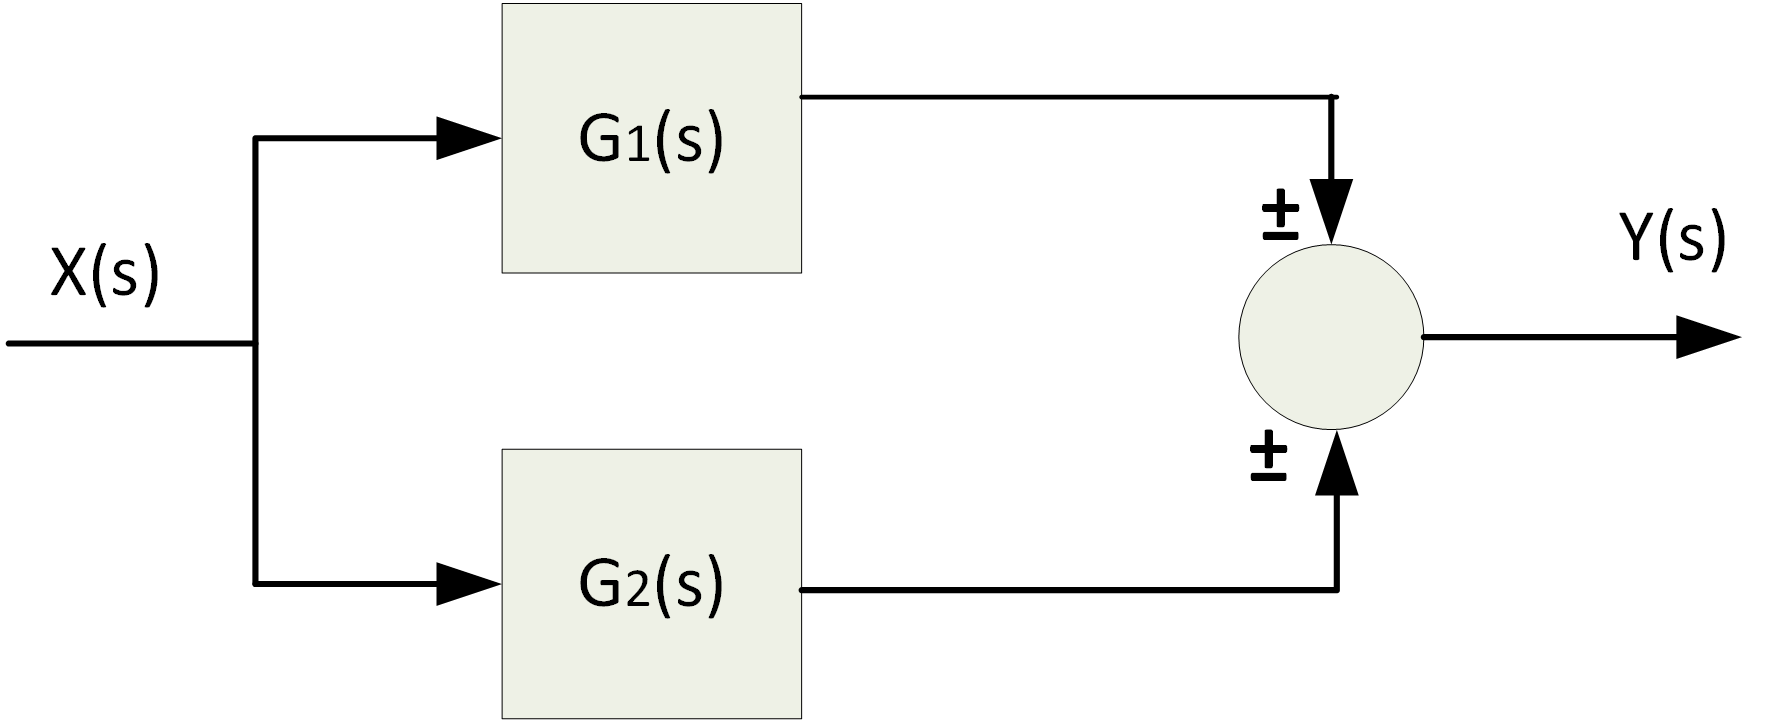

A FT resultante após esta operação é dada pela Equação 2.5

$$ G(s) = G_1(s) \pm G_2(s) $$

Ou seja, a FT de um sistema constituído pela operação paralela de subsistemas
nada mais é que a soma algébrica das FTs de cada subsistema. Sendo assim, no Scilab utilizam-se os operadores ‘+’ ou ‘-’, conforme mostrado abaixo:

$$ FT = FT_1 \pm FT_2 \pm FT_3 \pm \cdots \pm FT_N $$



###2.2.3 Função de Transferência de Sistemas em Malha Fechada
Um sistema em Malha Fechada (MF) usa uma medida do sinal de saída, Y(s), e a
comparação com a saída desejada, X(s), para gerar um sinal de erro, Ea(s) que é usado pelo controlador para ajustar o atuador (1). Esta operação pode ser vista na Figura 9.

A Função de Transferência em Malha Fechada (FTMF) é dada pela Equação 2.6

$$ T(s) = \frac{Y(s)}{X(s)} = \frac{1}{1+G(s).H(s)} $$



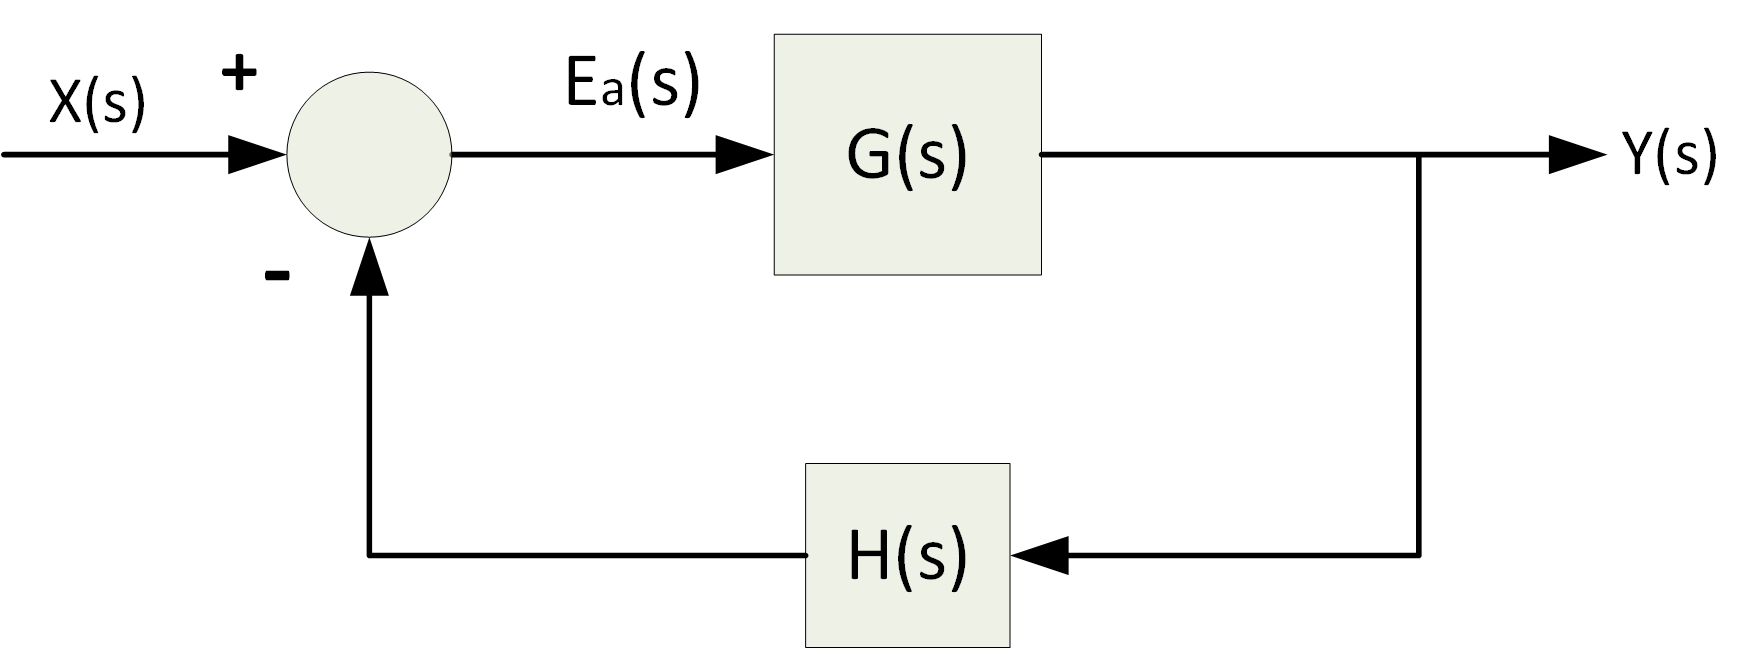

No Python, a forma de obter a FTMF é bem simples. Basta utilizar o seguinte comando:

$$ FTMF = G/H $$

onde, **G** e **H** representam as Funções de Transferência de Ramo direto e de realimentação, respectivamente.
**OBS**: No caso em que a realimentação do sistema seja unitária, ou seja, H(s) = 1, devemos também representá-la em forma de FT, conforme mostrado abaixo.



In [ ]:
num = 1   # Numerador da FT
den = 1 + (L/R)*s + L*C*s**2 # Denominador da FT
FT = num / den
print(FT)

**Exemplo 2.2:**
Utilizar o Python para a obtenção da FT resultante do sistema mostrado na Figura 10.

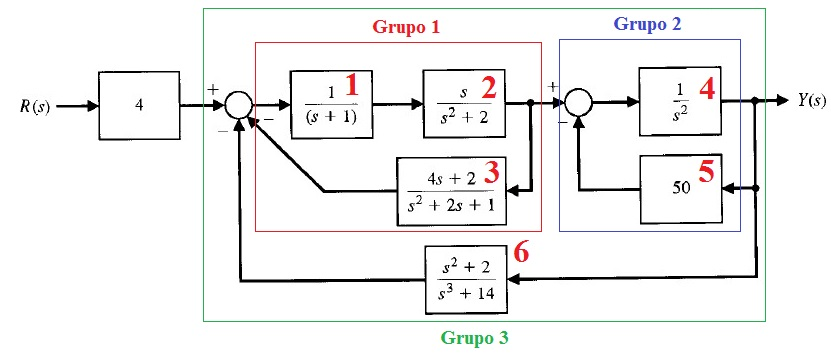

DICA: Subdividir o sistema em blocos e grupos para facilitar a implementação e a
identificação dos mesmos.

Solução em Python:

In [ ]:
# Exemplo 2.2:
s = ctl.tf('s')

# Funções de transferência de cada bloco - 1 ao 6
num = 1; den = s + 1; FT1 = num/den               # Bloco 1
num = s; den = s**2 + 2; FT2 = num/den            # Bloco 2
num = 4*s + 2;den = s**2 + 2*s + 1; FT3 = num/den  # Bloco 3
num = 1 ; den = s**2; FT4 = num/den                # Bloco 4
num = 50 ; den = s**0; FT5 = num/den               # Bloco 5
num = s**2 + 2 ; den = s**3 + 14; FT6 = num/den     # Bloco 6

# Funções de transferência de cada grupo - 1 ao 3
G = FT1*FT2; H = FT3; FTG1 = ctl.feedback(G,H,-1)    # Grupo 1
G = FT4; H = FT5; FTG2  = ctl.feedback(G,H,-1)        # Grupo 2
G = FTG1*FTG2; H = FT6; FTG3  = ctl.feedback(G,H,-1)  # Grupo 3
# Função de transferência final:
K = 4 # ganho fora da malha
FTFINAL = 4*FTG3
print(FTFINAL)

##2.3 Representação em Espaço de Estados
A representação em Espaço de Estados (EE) de qualquer sistema LIT pode ser feita conforme mostrado na Equação 2.7,

\begin{equation}
x(t) = Ax(t) + Bu(t)\\
y(t) = Cx(t) + Du(t)
\end{equation}

Onde **x** é o vetor de estados (uma coleção de todas as variáveis internas usadas para descrever a dinâmica do sistema em estudo), **y** é o vetor de saída e **u** é um vetor de entradas (8).
Para realizar tal representação no Python também utilizamos a função syslin, da
seguinte forma:

$$modEE = ctl.StateSpace(A,B,C,D)$$

Onde, **A**, **B**, **C** e **D** são matrizes constantes.
O Exemplo 2.3 mostra a representação do circuito RLC (Exemplo 2.1) no espaço
de estados.


**Exemplo 2.3:**


Para representar o circuito da Figura 6 em EE executa-se os seguintes passos:
1 – Escolha das Variáveis do Modelo:

a) Vetor de Estados:$ x = (I_L(t), V_c(t))$.

b) Vetor de Entrada: $u = (Vin(t))$.

c) Vetor de Saída: $u = (V_{out}(t))$.

2 – Escreva as equações associadas na forma de x˙(t) = Ax(t) + Bu(t)
a) Para a corrente no indutor (Equação 2.8):

$$ I_L = \frac{1}{L}.V_L(t) = \frac{1}{L}.(V_{in} - V_c(t)) = - \frac{1}{L}.V_C(t) +\frac{1}{L}.V_{in}(t) $$

b) Para a tensão no capacitor (Equação 2.9):

$$ I_L = \frac{1}{C}.I_C(t) = \frac{1}{C}.(I_L - I_R(t)) = - \frac{1}{C}.I_L(t) +\frac{1}{RC}.I_{C}(t) $$

Desse modo

$$
 \begin{bmatrix}
  I_L(t)  \\
  V_C(t)  \\
 \end{bmatrix}
 =
 \begin{bmatrix}
  0 & -\frac{1}{L} \\
  \frac{1}{C} & -\frac{1}{RC}
 \end{bmatrix}
 .
 \begin{bmatrix}
  I_L(t) \\
  V_C(t)
\end{bmatrix}
 +
\begin{bmatrix}
\frac{1}{L} \\
  0
\end{bmatrix}
.
\begin{bmatrix}
V_{in}(t)
\end{bmatrix}
$$

3 – Escreva a equação de saída na forma de $y(t) = Cx(t) + Du(t)$

$$
\begin{bmatrix}
V_{out}(t)
\end{bmatrix}
=
\begin{bmatrix}
0 & 1
\end{bmatrix}
.
\begin{bmatrix}
  I_L(t)  \\
  V_C(t)  \\
\end{bmatrix}
+
\begin{bmatrix}
0
\end{bmatrix}
.
\begin{bmatrix}
V_{in}(t)
\end{bmatrix}
$$

Os valores de R, L e são os mesmo do exemplo anterior.

**Colocar codigo em python**

A descrição do modelo em EE é mostrada abaixo.

In [ ]:
# Exemplo 2.3
R = 10;   # Resistor [Ohm]
L = 1e-3; # Indutor [H]
C = 1e-6; # Capacitor [F]
# Matrizes do Sistema
A = [ [0, -1/L], [1/C, -1/(R*C)] ]
B = [ [1/L], [0]]
C = [ [0, 1] ]
D = [ [0] ]
# Matrizes do Sistema
modEE = ctl.StateSpace(A,B,C,D)
print(modEE)

##2.4 Conversão entre Representações
Nas seções 2.2 e 2.3 mostrou-se como é feita a representação de sistemas lineares utilizando a função de transferência e o modelo em espaço de estados, respectivamente.
Conforme destacado, a função primordial para obter essas representações é a syslin. No Python, é possível obter uma dessas representações a partir da outra e vice-versa.
Para obter a representação em FT a partir do modelo em EE utiliza-se a função
ss2ft, conforme mostrado abaixo:

**Colocar código em python**

**Exemplo 2.4**
Considerando novamente o circuito RLC mostrado na Figura 6 e as suas representações em função de transferência e em espaço de estados dadas pelas equações 2.3 e 2.10, respectivamente. Tais transformações são mostradas abaixo.

In [ ]:
R = 10;   # Resistor [Ohm]
L = 1e-3; # Indutor [H]
C = 1e-6; # Capacitor [F]
# Matrizes do Sistema
A = [ [0, -1/L], [1/C, -1/(R*C)] ]
B = [ [1/L], [0]]
C = [ [0, 1] ]
D = [ [0] ]
# Representação em EE
modEE = ctl.StateSpace(A,B,C,D)
print(modEE)

In [ ]:
# Conversão para FT:
FT = ctl.ss2tf(modEE)
print(FT)

In [ ]:
# Reconversão
EE = ctl.tf2ss(FT)
print(EE)